### Question 2

**********This is an R based analysis**************

#### Part(a)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



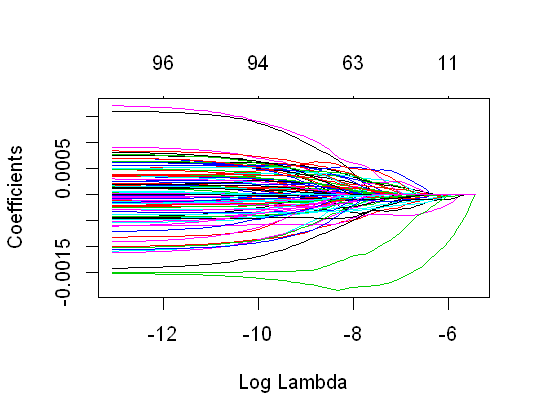

In [1]:
options(repr.plot.width=4.5, repr.plot.height=3.5)
# Part (a)
trends_train = read.csv("trends_train.csv")
#plot(trends_train$Week, trends_train$logret,type = '')
X_train = as.matrix(trends_train[,c(-98,-1)]) # Remove week and the output column
y_train = as.matrix(trends_train$logret)      # Only the output column
library(glmnet)
fit_lasso = glmnet(X_train,y_train,family='gaussian',alpha=1)
plot(fit_lasso,xvar='lambda')

#### Part (b)

[1] 0.002991654

[1] 0.004340378

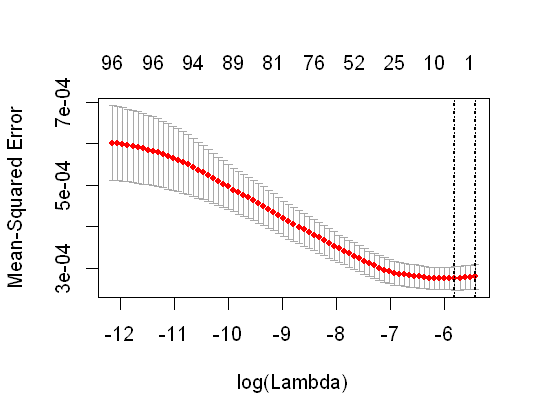

In [2]:
cv_lasso = cv.glmnet(X_train,y_train,family='gaussian',alpha=1)
#names(cv_lasso)
#Plot the average cv error
plot(cv_lasso)
abline(v=log(cv_lasso$lambda.min),lty=3,lwd=2)
abline(v=log(cv_lasso$lambda.1se),lty=3,lwd=2)
cv_lasso$lambda.min
cv_lasso$lambda.1se

#### Part (c)
Below shows the non-zero coefficients from the lasso regression under two selection methods. For the case where the $\lambda$ minimizing the CV-MSE is chosen, there are only 4 variables (not counting the intercept) with non-zero co-efficients among 96 total variables.

The case where $\lambda$ corresponding to 1se is chosen, the only non-zero parameter is the intercept. 

This shows that the trends data doesn't indicate any strong forecasting signal based on the results obtained from lasso regression.

In [3]:
#Selection Rule : Minimization
beta_lasso = coef(fit_lasso, s=cv_lasso$lambda.min)
beta_lasso_nz = beta_lasso[beta_lasso!=0]
#names(beta_lasso_nz) = names(beta_lasso)[beta_lasso!=0]
print(beta_lasso_nz)

#Selection Rule : 1se
beta_lasso = coef(fit_lasso, s=cv_lasso$lambda.1se)
beta_lasso_nz = beta_lasso[beta_lasso!=0]
#names(beta_lasso_nz) = names(beta_lasso)[beta_lasso!=0]
print(beta_lasso_nz)

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient


[1]  1.611711e-03 -4.985075e-05 -6.544947e-04 -4.422046e-05 -1.623596e-05


<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient


[1] 0.001572434


#### Part (d)
From below plot between the predicted values and true values, I see very little amount of accurate prediction made by the model with the given data. I can see that the scatter plot is almost flattened and the range of predicted values is between [-.01, 0.01 ] whereas the true values range between [-0.07, 0.04]. So overall I would say the prediction is of very poor quality although there is some upward trend among the points in the plot but the accuracy is still very low.

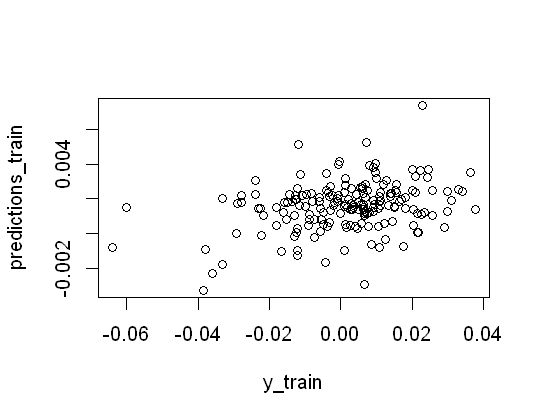

In [4]:
predictions_train = predict(fit_lasso,newx=X_train,s=cv_lasso$lambda.min)
#mean(()-y_test)^2)
plot(y_train,predictions_train,)

#### Part (e)
Below runs the trading strategy based on the prediction results on training set and compares with the buy and hold strategy. We can see that the return over the horizon period is 2.08\% based on the prediction model compared to 1.33\% with the buy and hold strategy

In [5]:
realized_logret_train = sign(predictions_train)*y_train
total_logret_train = sum(realized_logret_train)
print("Trading Horizon (in weeks)")
print(nrow(trends_train))
print("Log eturn for the trading strategy using lambda-min is")
print(total_logret_train)
print("Log return for buy and hold trading strategy is")
print(sum(y_train))

[1] "Trading Horizon (in weeks)"
[1] 180
[1] "Log eturn for the trading strategy using lambda-min is"
[1] 0.7621045
[1] "Log return for buy and hold trading strategy is"
[1] 0.2830381


#### Part (f)
I apply the lasso regression based prediction with $\lambda_{min}$ to the test data and below shows the return of the trading strategy over the trading horizon. I also calculate the return with the buy and hold strategy on the test data. We can observe that the prediction strategy does poorly compared to the buy and hold strategy and thus indicates the trends data along with the associated model has very poor forecasting ability.

In [8]:
trends_test = read.csv("trends_test.csv")
X_test = as.matrix(trends_test[,c(-98,-1)]) # Remove week and the output column
y_test = as.matrix(trends_test$logret)      # Only the output column

predictions_test = predict(fit_lasso,newx=X_test,s=cv_lasso$lambda.min)
#plot(y_train,predictions_train,)
realized_logret_test = sign(predictions_test)*y_test
total_logret_test = sum(realized_logret_test)
print("Trading Horizon (in weeks)")
print(nrow(trends_test))
print("Log return for the trading strategy using lambda-min on test set is")
print(total_logret_test)
print("Log return for buy and hold trading strategy on test set is")
print(sum(y_test))

[1] "Trading Horizon (in weeks)"
[1] 79
[1] "Log return for the trading strategy using lambda-min on test set is"
[1] 0.1439524
[1] "Log return for buy and hold trading strategy on test set is"
[1] 0.3461536


The $\lambda_{1s.e.}$ model only has one intercept term, thus it always returns the same value. Trading strategy based on a constant value prediction is equivalent to the buy and hold strategy. As the buy-and hold strategy outperforms the $\lambda_{min}$ based prediction strategy, it seems the $\lambda_{1s.e.}$ based would provide a better result.